### Filters

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftfreq
import pdb
import warnings
warnings.filterwarnings("ignore")

In [2]:
def sine(f, t, a=1):
    return a * np.sin((2 * np.pi * f ) * t)


def mixed_sine(freqs, time):
    sig = np.zeros((len(freqs), len(time)))
    for i, freq in enumerate(freqs):
        sig[i, :] = sine(f=freq, t=time, a=np.random.randint(1, 10))
    return np.sum(sig, 0)


def fourier(sig, fs, n=None):
    if n is None:
        n = len(sig)
    sigX = fft(sig, n)
    sigX = sigX / n
    f = fftfreq(n, 1/fs)
    return sigX[f >= 0], f[f >= 0]

## create a signal

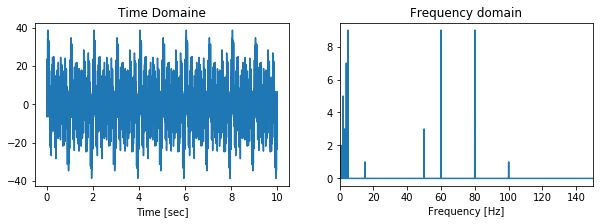

In [28]:
t_min = 0
t_max = 10
fs = 1000

t = np.arange(t_min, t_max, 1/fs)
freqs = [1, 2, 3, 4,4.5, 5, 15, 50, 60, 80, 100]

sig = mixed_sine(freqs, t)
sigX, freqs = fourier(sig, fs)

f, a  = plt.subplots(1, 2, figsize=(10, 3))


a[0].plot(t, sig)
a[0].set_title('Time Domaine')
a[0].set_xlabel('Time [sec]')
a[1].plot(freqs, 2 * np.abs(sigX))
a[1].set_xlim([0, 150])
a[1].set_title('Frequency domain')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

## band pass filter

### create the filter and inspect the kernel

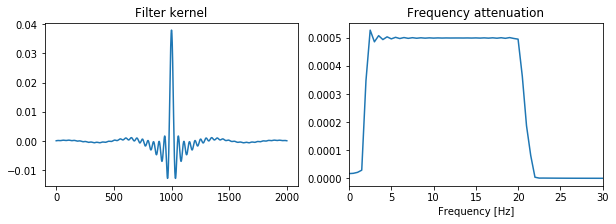

In [29]:
def bandpass_filter_kernel(freqs, fs, t_zone=0.1, order=None):
    if order is None:
        order = np.round(4 * (fs / freqs[0]))
    if order % 2 == 0:
        order += 1 
    nyq = np.round(fs/2)
    freqs = np.array([0, freqs[0] - (freqs[0] * t_zone), freqs[0], freqs[1], freqs[1] + (freqs[1] * t_zone), nyq])
    freqs *= (1 / nyq)
    ideal = (0, 0, 1, 1, 0, 0)
    kernel = signal.firls(order, freqs, ideal)
    kX, kf = fourier(kernel, fs)
    return kernel, kX, kf


freqs = [2, 20]
fs = 1000
kernel, kX, kf = bandpass_filter_kernel(freqs, fs)

f, a = plt.subplots(1, 2, figsize=(10, 3))
a[0].plot(kernel)
a[0].set_title('Filter kernel')
a[1].plot(kf, np.abs(kX))
a[1].set_xlim([0, 30])
a[1].set_title('Frequency attenuation')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

### apply the filter to the data

(0, 120)

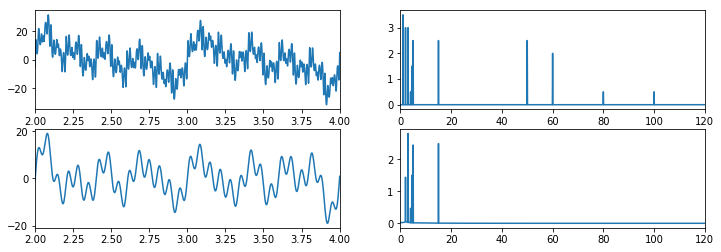

In [7]:
filtered = signal.filtfilt(kernel, 1, sig)

filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, a = plt.subplots(2, 2, figsize=(12, 4))
a[0, 0].plot(t, sig)
a[0, 0].set_xlim([2, 4])
a[1, 0].plot(t, filtered)
a[1, 0].set_xlim([2, 4])

a[0, 1].plot(freqs, np.abs(sigX))
a[0, 1].set_xlim([0, 120])
a[1, 1].plot(filtered_f, np.abs(filteredX))
a[1, 1].set_xlim([0, 120])

### low pass filter

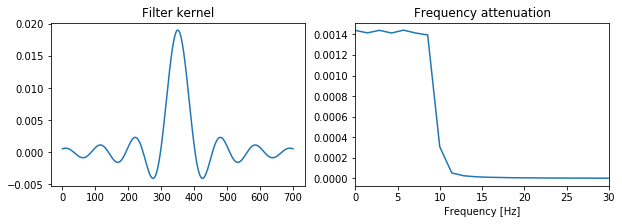

In [35]:
def low_filter_kernel(freqs, fs, t_zone=0.1, order=None):
    if order is None:
        order = np.round(7 * (fs / freqs))
    if order % 2 == 0:
        order += 1 
    nyq = np.round(fs/2)
    freqs = np.array([0, freq - (freq * t_zone), freq, nyq])
    freqs *= (1 / nyq)
    ideal = (1, 1, 0, 0)
    kernel = signal.firls(order, freqs, ideal)
    kX, kf = fourier(kernel, fs)
    return kernel, kX, kf


freq = 10
fs = 1000
kernel, kX, kf = low_filter_kernel(freq, fs)

f, a = plt.subplots(1, 2, figsize=(10, 3))
a[0].plot(kernel)
a[0].set_title('Filter kernel')
a[1].plot(kf, np.abs(kX))
a[1].set_xlim([0, 30])
a[1].set_title('Frequency attenuation')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

(0, 120)

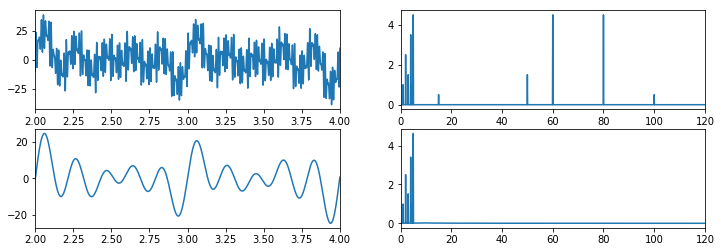

In [36]:
filtered = signal.filtfilt(kernel, 1, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, a = plt.subplots(2, 2, figsize=(12, 4))
a[0, 0].plot(t, sig)
a[0, 0].set_xlim([2, 4])
a[1, 0].plot(t, filtered)
a[1, 0].set_xlim([2, 4])

a[0, 1].plot(freqs, np.abs(sigX))
a[0, 1].set_xlim([0, 120])
a[1, 1].plot(filtered_f, np.abs(filteredX))
a[1, 1].set_xlim([0, 120])

### high pass filter

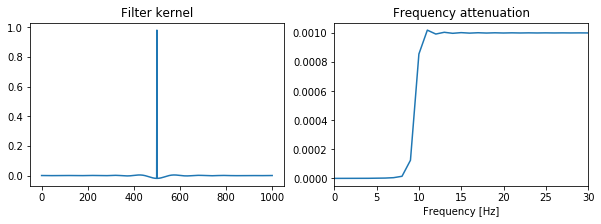

In [41]:
def high_filter_kernel(freqs, fs, t_zone=0.1, order=None):
    if order is None:
        order = np.round(10 * (fs / freqs))
    if order % 2 == 0:
        order += 1 
    nyq = np.round(fs/2)
    freqs = np.array([0, freq - (freq * t_zone), freq, nyq])
    freqs *= (1 / nyq)
    ideal = (0, 0, 1, 1)
    kernel = signal.firls(order, freqs, ideal)
    kX, kf = fourier(kernel, fs)
    return kernel, kX, kf

freq = 10
fs = 1000
kernel, kX, kf = high_filter_kernel(freq, fs)

f, a = plt.subplots(1, 2, figsize=(10, 3))
a[0].plot(kernel)
a[0].set_title('Filter kernel')
a[1].plot(kf, np.abs(kX))
a[1].set_xlim([0, 30])
a[1].set_title('Frequency attenuation')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

(0, 120)

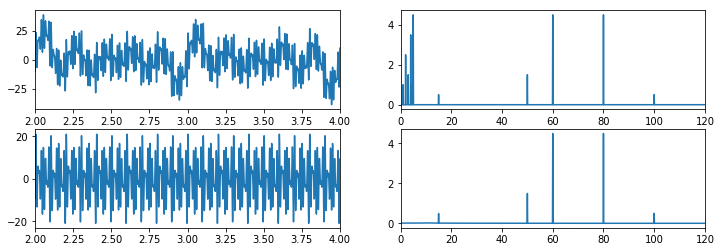

In [42]:
filtered = signal.filtfilt(kernel, 1, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, a = plt.subplots(2, 2, figsize=(12, 4))
a[0, 0].plot(t, sig)
a[0, 0].set_xlim([2, 4])
a[1, 0].plot(t, filtered)
a[1, 0].set_xlim([2, 4])

a[0, 1].plot(freqs, np.abs(sigX))
a[0, 1].set_xlim([0, 120])
a[1, 1].plot(filtered_f, np.abs(filteredX))
a[1, 1].set_xlim([0, 120])